# Learning outcomes
1. Gentle intro on CV
2. Review on some important notion of image arrays
3. Cropping (one of the data augmentation techniques employed in DL model training)
4. Slit and merge image channels
5. Point Operator (basic mathematical operation)/gamma correction
    - Aims: enhance/reduce the contrast or illumination of the images
6. Image blending (add 2 images embeded)

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import show_img

## review: important concepts on image arrays
Images can be broadly categorized as **grayscale** and **color** images.

| Grayscale | Color |
| -:- | -:- |
| matrix (2D array) | 3D array (channels) |
| (h, w) | (h, w, channels) |

In [17]:
img = np.zeros((2, 4), dtype=np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


In [18]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_bgr)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [22]:
img[0, 1] = 30
img[1, 2] = 100
print(img)

[[  0  30   0   0]
 [  0   0 100   0]]


In [21]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_bgr)

[[[  0   0   0]
  [ 30  30  30]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [100 100 100]
  [  0   0   0]]]


## Accessing pixel elements

In [6]:
img = cv.imread("images/lena.jfif")

a = img[50, 70, 0]
b = img.item(50, 70, 0)
a == b

True

In [7]:
%timeit a = img[50, 70, 0]
%timeit b = img.item(50, 70, 0)

99.1 ns ± 4.07 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
77.7 ns ± 1.3 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


The takeaway the execution time is more or less the same. You are free to use either on of this.

## Numpy slicing

In [8]:
# Extract the top left region of the images
yc, xc = img.shape[0] // 2, img.shape[1] // 2 #yc = center of y, xc = center of x

topleft = img[:yc, :xc]

show_img("topleft", topleft)

In [9]:
middle = img[yc-30:yc+30, xc-30:xc+30]

show_img("middle", middle)

In [12]:
# create a white image
white = np.zeros((200, 200)) + 255
white = np.uint8(white)

show_img("white", white)

### Exercise

In [4]:
# Q2: design pattern
patch = np.zeros((30, 30), dtype=np.uint8)

patch[:10, 10:20] = 255
patch[10:20, :10] = 255
patch[10:20, 20:] = 255
patch[20:, 10:20] = 255

img = np.tile(patch, (3,3))

show_img("img", img)

In [5]:
# Q3: extract object of interest
img = cv.imread("images/dog.jfif")

show_img("img", img)

In [3]:
[i for i in dir(cv) if i.startswith('event')]
#mouse_events = [j for j in dir(cv) if 'EVENT' in j]  
#print(mouse_events) 

[]

In [7]:
#1 way:
def select_rect(event, x, y, flags, params):
    """Mouse click callback function"""
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        cv.circle(img, (x, y), 1, (0, 0, 255), -1)
        cv.imshow("img", img)

img = cv.imread("images/dog.jfif")
cv.imshow("img", img)
cv.setMouseCallback("img", select_rect)
cv.waitKey(0)
cv.destroyAllWindows()

(90, 40)
(219, 135)
(211, 31)
(99, 143)
(221, 88)
(94, 90)
(153, 10)
(161, 164)
(231, 40)
(71, 104)
(82, 121)
(84, 129)
(109, 131)
(169, 96)
(216, 90)
(238, 103)
(241, 121)
(195, 122)
(139, 76)
(147, 71)
(179, 61)
(4, 3)
(2, 4)
(1, 4)
(0, 3)
(0, 0)


In [5]:
#2 way:
bbox = cv.selectROI('flower_region', img)

In [6]:
#3 way:
# top left coordinates: (91, 38) and bottom right coordinates: (170, 120)
flower = img[38:120, 91:170]

show_img("flower", flower)

## Image cropping
In terms of operation, it is identical to slicing

In [3]:
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

h, w = img.shape[:2]
n_vertical_grids = 3
n_horizontal_grids = 3

# row sizes and column sizes
M = int(h / n_vertical_grids)
N = int(w / n_horizontal_grids)

tiles = []

for y in range(0, h, M):
    for x in range(0, w, N):
        x1 = x + N
        y1 = y + M
        
        if x1 > w and y1 > h:
            x1 = w - 1
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:w]
            tiles.append(tile)
        
        elif y1 > h:
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:w]
            tiles.append(tile)
            
        elif x1 > w:
            x1 = w -1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:w]
            tiles.append(tile)
            
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:w]
            tiles.append(tile)
            
show_img("crop", img_copy)

In [4]:
show_img("top right", tiles[2])

## Exercise 1 (image cropping)

In [7]:
img_array = np.zeros_like(img)

yc, xc = img.shape[0] // 2,img.shape[1] // 2

img_array[:yc, :xc] = img[yc:, xc:]
img_array[yc:, xc:] = img[:yc, :xc]
img_array[yc:, :xc] = img[:yc, xc:]
img_array[:yc, xc:] = img[yc:, :xc]
show_img("swap", img_array)

## Split and merge color channels

In [9]:
b, g, r = cv.split(img)
img_merge = cv.merge((b, g, r))

In [10]:
np.array_equal(img, img_merge)

True

In [15]:
import matplotlib.pyplot as plt

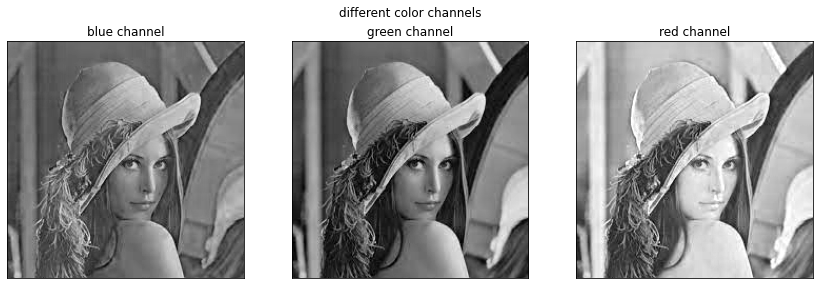

In [17]:
img = cv.imread("images/lena.jfif")

b, g, r = cv.split(img)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.suptitle("different color channels")
ax1.imshow(b, cmap=plt.cm.gray)
ax1.set(title="blue channel", xticks=[], yticks=[])
ax2.imshow(g, cmap=plt.cm.gray)
ax2.set(title="green channel", xticks=[], yticks=[])
ax3.imshow(r, cmap=plt.cm.gray)
ax3.set(title="red channel", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

### Exercise no 2: color channels

In [3]:
img = cv.imread("images/dog.jfif")

channels = cv.split(img)

colors = ("blue", "green", "red")

imgs = []

for i, mat in enumerate(channels):
    arr = np.zeros_like(img)
    arr[:, :, i] = mat
    imgs.append(arr)
    
for c, img, in zip(colors, imgs):
    cv.imshow(c, img)
    
cv.waitKey(0)
cv.destroyAllWindows()

## Point operators
$$f_{trans}(\textbf{x}) = af(x) + β$$

In [24]:
np.array([-2, 0, 99, 260], dtype=np.uint8)

array([254,   0,  99,   4], dtype=uint8)

In [2]:
def point_op(img, alpha, beta):
    """point operators. Arguments
    1. Source mage
    2. Multiplier
    3. Constant"""
    img = img.astype(float)
    res = alpha * img + beta
    res = np.clip(res, 0, 255)
    res = np.uint8(res)
    return res

In [11]:
# increase the brightness and contrast of image
img = cv.imread("images/bridge.jfif")

transform = point_op(img, 2, 30)

cv.imshow("original", img)
show_img("transform", transform)

In [9]:
transform2 = point_op(img, 0.8, -20)

show_img("img_transform", transform2)

## Gamma correction
$$O = (\frac{I}{255})^\gamma \times {255} $$

In [20]:
gamma = 1 / 2.2

lookUpTable = np.empty((1, 256), dtype=np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255, 0, 255)
    
img = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img, lookUpTable)

cv.namedWindow("original", cv.WINDOW_NORMAL)
cv.imshow("orignal", img)
show_img("gamma corrected", res, adjust=True)

## Image blending (add 2 images)
$$h(\textbf{x}) = \alpha f(\textbf{x}) + (1 - \alpha)g(\textbf{x}) + \beta$$

In [16]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

alpha = 0.6
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

cv.imshow("img1", img)
cv.imshow("img2", img2)
show_img("blending", res)

## Exercise 1
1. Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixels of both images identical.

In [10]:
# Define the width and height
width = 400
height = 300

# The number of 3 is to define the 3D array for rgb color.
random_noise_color = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)

# Random grayscale image
random_noise_gray = np.random.randint(0, 256, (height, width), dtype=np.uint8)

cv.imshow("Random Noise (Color)", random_noise_color)
cv.imshow("Random Noise (Grayscale)", random_noise_gray)
cv.waitKey(0)
cv.destroyAllWindows()

## Exercise 2
2. Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:

crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

#img is the source image

#num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.

#line_color is the color of the grid line.

#The output of the function should be image with grids

In [3]:
img = cv.imread('images/dog.jfif')

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    # img is the source image. Copy source img
    img_copy = img.copy()
    
    # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
    height, width = img.shape[:2]
    num_vertical_patches = num_vertical_grid
    num_horizontal_patches = num_horizontal_grid

    # M and N are basically number of pixels per patch
    M, N = int(height / num_vertical_patches), int(width / num_horizontal_patches)

    x1, y1 = 0, 0
    
    for y in range(0, height, M):
        for x in range(0, width, N):
        
            y1 = y + M
            x1 = x + N
        
            if x1>=width and y1>=height:
                x1 = width-1
                y1 = height-1
                tile = img[y:height, x:width]
                cv.rectangle(img_copy, (x,y), (x1, y1), line_color, 1)
                cv.imshow('tile', tile)
            
            elif y1>=height:
                y1 = height-1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
            
            elif x1>=width:
                x1 = width-1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
            
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
    return img_copy

# Divides the image into a 3x2 grid with red grid lines
cropped_img = crop_grid(img, 3, 2, (0, 0, 255))
cv.imshow('patched image', cropped_img)
cv.waitKey(0)
cv.destroyAllWindows()

## Exercise 3
3. Display image sequences of smooth transition of two images with different values of α. Refer to code in section "Image blending". Use "lena.jfif" and "coins.jfif" as the base images.

In [41]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# Define different alpha value in array
alpha = [0.1, 0.3, 0.5, 0.7, 0.9]
num = 0.1

h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

# To show all the image based on different alpha value
for alpha in alpha:
    res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)
    cv.imshow(f"Alpha: {alpha:.1f}", res)
    num += 0.2
    
cv.waitKey(0)
cv.destroyAllWindows()

## Exercise 4
4 Suppose you are a digital content creator and wish to share photo online. However, you wish to protect these images from being stolen or altered by others. Leverage your image processing knowledge to apply watermark on image "travel_hd.jpg".

In [40]:
img = cv.imread("images/travel_hd.jpg")
img2 = cv.imread("images/watermark.png")

# Define different alpha value in array
alpha = 0.8

watermark = cv.resize(img2, (500, 500))
travel = cv.resize(img, (500, 500))

# To show all the image based on different alpha value
WaterPic = cv.addWeighted(travel, alpha, watermark, 1-alpha, 0)

cv.imshow("WaterPic", WaterPic)
cv.waitKey(0)
cv.destroyAllWindows()